# Part 1 : EDA and data preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## EDA

In [2]:
df_walmart = pd.read_csv("Walmart_Store_sales.csv")
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [3]:
print(f"Number of rows : {df_walmart.shape[0]}")

Number of rows : 150


In [4]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [5]:
df_walmart.describe(include  = 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [6]:
print("Percentage of missing values: ")
display(100 * df_walmart.isna().sum() / df_walmart.shape[0])

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

figures the target variable

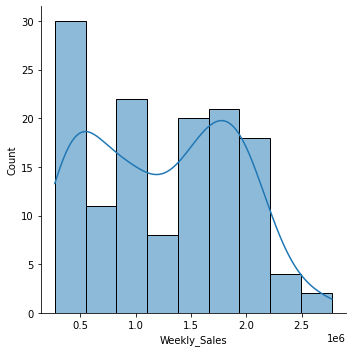

In [7]:
# distribution of Weekly_Sales
sns.displot(df_walmart.Weekly_Sales, kde = True)

In [8]:
df_walmart["Weekly_Sales_log"] = np.log10(df_walmart.Weekly_Sales)
df_walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales_log
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000,136.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430,6.021669
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173,0.276137
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000,5.429638
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500,5.781799
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000,6.100857
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000,6.256811
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000,6.442699


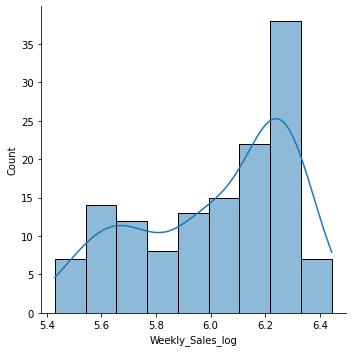

In [9]:
# distribution of Weekly_Sales_log
sns.displot(df_walmart.Weekly_Sales_log, kde = True)

figures with categorical features

In [10]:
df_walmart["Store"] = df_walmart["Store"].astype(str)
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Store             150 non-null    object 
 1   Date              132 non-null    object 
 2   Weekly_Sales      136 non-null    float64
 3   Holiday_Flag      138 non-null    float64
 4   Temperature       132 non-null    float64
 5   Fuel_Price        136 non-null    float64
 6   CPI               138 non-null    float64
 7   Unemployment      135 non-null    float64
 8   Weekly_Sales_log  136 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.7+ KB


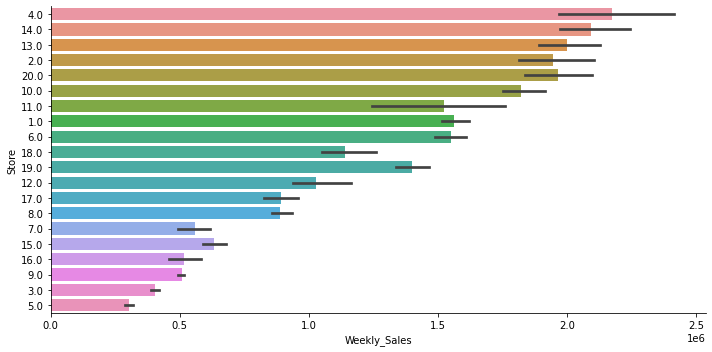

In [11]:
sns.catplot(x="Weekly_Sales",
            y="Store",
            data=df_walmart.sort_values('Weekly_Sales', ascending= False),
            kind="bar",
            height=5,
            aspect=2)

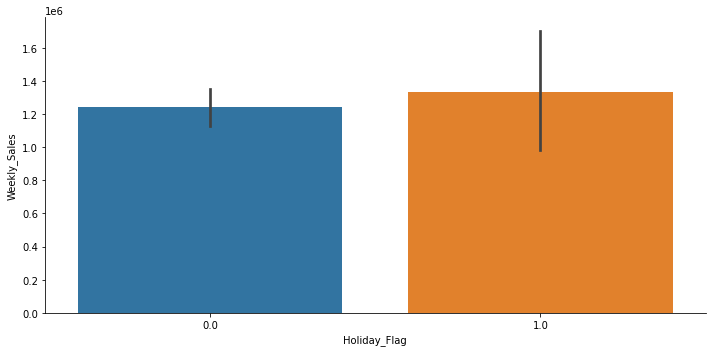

In [12]:
sns.catplot(x="Holiday_Flag",
            y="Weekly_Sales",
            data=df_walmart,
            kind="bar",
            height=5,
            aspect=2)

figures with numerical vatiables

<AxesSubplot:xlabel='Temperature', ylabel='Weekly_Sales'>

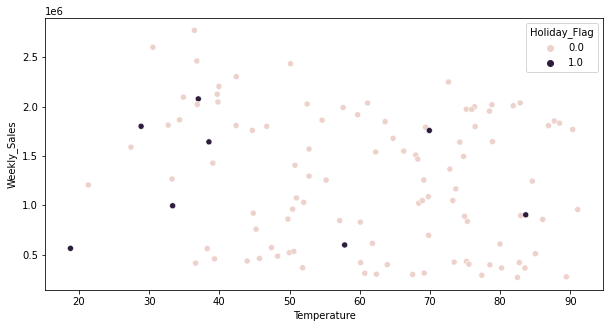

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Temperature",
                y="Weekly_Sales",
                hue="Holiday_Flag",
                data=df_walmart)

<AxesSubplot:xlabel='Fuel_Price', ylabel='Weekly_Sales'>

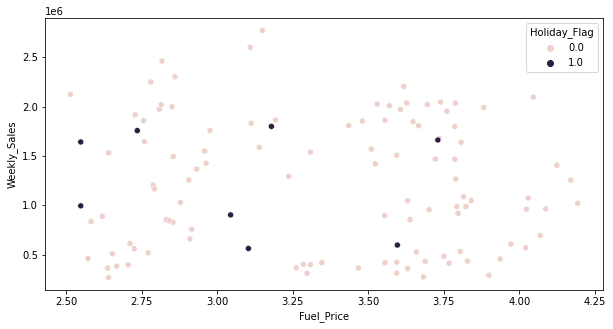

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Fuel_Price",
                y="Weekly_Sales",
                hue="Holiday_Flag",
                data=df_walmart)

<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

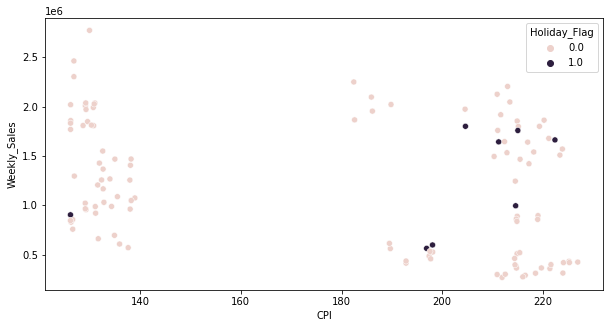

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="CPI",
                y="Weekly_Sales",
                hue="Holiday_Flag",
                data=df_walmart)

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

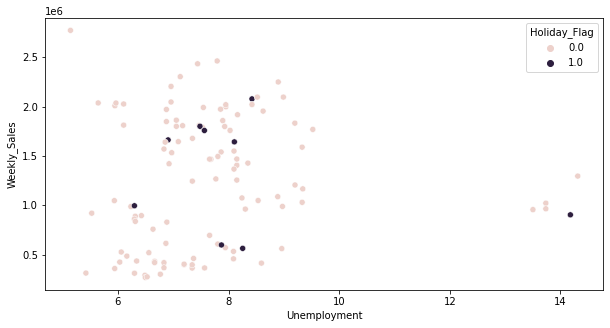

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Unemployment",
                y="Weekly_Sales",
                hue="Holiday_Flag",
                data=df_walmart)

## Preprocessing to be planned with pandas

Drop lines where target values are missing 

In [17]:
df_walmart.drop(columns="Weekly_Sales_log", inplace=True)

Create usable features from the Date column

In [18]:
df_walmart.loc[:1,"Date"]

0    18-02-2011
1    25-03-2011
Name: Date, dtype: object

In [19]:
# transform Date object in datetime
df_walmart.loc[:,"Date"] = pd.to_datetime(df_walmart.loc[:,"Date"],format = "%d-%m-%Y")
df_walmart.loc[:1,"Date"]

0   2011-02-18
1   2011-03-25
Name: Date, dtype: datetime64[ns]

In [51]:
df_walmart.loc[:,"Year"] = df_walmart.loc[:,'Date'].dt.year
df_walmart.loc[:,"Month"] = df_walmart.loc[:,'Date'].dt.month
df_walmart.loc[:,"Day"] = df_walmart.loc[:,'Date'].dt.day
df_walmart.loc[:,"DayOfWeek"] = df_walmart.loc[:,'Date'].dt.dayofweek

Drop lines containing invalid values

In [52]:
df_walmart_clean = df_walmart.dropna(axis=0)
df_walmart_clean.shape

(75, 17)

In [53]:
df_walmart_clean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day of week,Year,Month,Day,Day of week,DayOfWeek
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0,2011.0,3.0,25.0,4.0,4.0
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0,2010.0,5.0,28.0,4.0,4.0
6,15.0,2011-06-03,695396.19,0.0,69.80,4.069,134.855161,7.658,2011.0,6.0,3.0,4.0,2011.0,6.0,3.0,4.0,4.0
7,20.0,2012-02-03,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012.0,2.0,3.0,4.0,2012.0,2.0,3.0,4.0,4.0
10,8.0,2011-08-19,895066.50,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0,2011.0,8.0,19.0,4.0,4.0


In [54]:
df_walmart_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 1 to 149
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         75 non-null     object        
 1   Date          75 non-null     datetime64[ns]
 2   Weekly_Sales  75 non-null     float64       
 3   Holiday_Flag  75 non-null     float64       
 4   Temperature   75 non-null     float64       
 5   Fuel_Price    75 non-null     float64       
 6   CPI           75 non-null     float64       
 7   Unemployment  75 non-null     float64       
 8   year          75 non-null     float64       
 9   month         75 non-null     float64       
 10  day           75 non-null     float64       
 11  day of week   75 non-null     float64       
 12  Year          75 non-null     float64       
 13  Month         75 non-null     float64       
 14  Day           75 non-null     float64       
 15  Day of week   75 non-null     float64    

In [55]:
# Drop columns
drop_cols = ['Date']

print("Dropping useless columns...")
df_walmart_clean = df_walmart_clean.drop(drop_cols, axis=1)

Dropping useless columns...


Drop lines containing outliers

In [56]:
def drop_outliers(df, col):

    """ function with 2 arguments a DataFrame and a string, to remove outliers by columns
        numeric features that don't fall within the range : [mean(X) - 3*std(X) ; mean(X) + 3*std(X)]
    """
    to_keep = ((df[col] < df[col].mean() + 3 * df[col].std()) & (df[col] > df[col].mean() - 3 * df[col].std()))
    df = df.loc[to_keep,:]

    return df

In [57]:
outliers_features = ["Temperature","Fuel_Price", "CPI", "Unemployment"]

for col in outliers_features :
    df_walmart_clean = drop_outliers(df_walmart_clean, col)

In [58]:
df_walmart_clean

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,day of week,Year,Month,Day,Day of week,DayOfWeek
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0,2011.0,3.0,25.0,4.0,4.0
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0,2010.0,5.0,28.0,4.0,4.0
6,15.0,695396.19,0.0,69.80,4.069,134.855161,7.658,2011.0,6.0,3.0,4.0,2011.0,6.0,3.0,4.0,4.0
7,20.0,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012.0,2.0,3.0,4.0,2012.0,2.0,3.0,4.0,4.0
10,8.0,895066.50,0.0,82.92,3.554,219.070197,6.425,2011.0,8.0,19.0,4.0,2011.0,8.0,19.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,7.0,532739.77,0.0,50.60,3.804,197.588605,8.090,2012.0,5.0,25.0,4.0,2012.0,5.0,25.0,4.0,4.0
143,3.0,396968.80,0.0,78.53,2.705,214.495838,7.343,2010.0,6.0,4.0,4.0,2010.0,6.0,4.0,4.0,4.0
144,3.0,424513.08,0.0,73.44,3.594,226.968844,6.034,2012.0,10.0,19.0,4.0,2012.0,10.0,19.0,4.0,4.0
145,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010.0,6.0,18.0,4.0,2010.0,6.0,18.0,4.0,4.0


In [59]:
df_walmart_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 1 to 149
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         71 non-null     object 
 1   Weekly_Sales  71 non-null     float64
 2   Holiday_Flag  71 non-null     float64
 3   Temperature   71 non-null     float64
 4   Fuel_Price    71 non-null     float64
 5   CPI           71 non-null     float64
 6   Unemployment  71 non-null     float64
 7   year          71 non-null     float64
 8   month         71 non-null     float64
 9   day           71 non-null     float64
 10  day of week   71 non-null     float64
 11  Year          71 non-null     float64
 12  Month         71 non-null     float64
 13  Day           71 non-null     float64
 14  Day of week   71 non-null     float64
 15  DayOfWeek     71 non-null     float64
dtypes: float64(15), object(1)
memory usage: 9.4+ KB


Preprocessings to be planned with scikit-learn

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

In [61]:
# Separate target variable Y from features X
target_name = 'Weekly_Sales'

print("Separating labels from features...")
Y = df_walmart_clean.loc[:,target_name]
X = df_walmart_clean.drop(target_name, axis = 1) # All columns are kept, except the target

Separating labels from features...


In [69]:
# First : always divide dataset into train set & test set !!
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Dividing into train and test sets...


In [70]:
#  numeric features
numeric_features = ["Temperature","Fuel_Price", "CPI", "Unemployment", "Year", "Month", "Day", "DayOfWeek"] # Names of numeric columns in X_train/X_test
scaler =StandardScaler()

# categorical features
categorical_features = ['Store', 'Holiday_Flag'] # Names of categorical columns in X_train/X_test
onehot = OneHotEncoder(drop='first', handle_unknown='ignore') # first column will be dropped to avoid creating correlations between features


In [71]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features),
        ('cat', onehot, categorical_features)
    ])

In [72]:
# Preprocessings on train set
X_train = preprocessor.fit_transform(X_train)

# Preprocessings on test set
X_test = preprocessor.transform(X_test)

c:\Users\sylva\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Part 2 : Baseline model (linear regression)

In [74]:
# Train model
model = LinearRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Training model...
...Done.


In [75]:
# Predictions on training set
Y_train_pred = model.predict(X_train)
print(Y_train_pred[0:5])

[1757242.51       2148381.3193371  2004455.30935285  519823.3
  806604.00566442]


In [76]:
# Predictions on test set
Y_test_pred = model.predict(X_test)
print(Y_test_pred[0:5])

[1528654.4838336   439716.17962197 2075296.6542032   899644.99612013
  404285.59436019]


In [80]:
# Print scores
print("Accuracy on training set : ", model.score(X_train, Y_train)) # Here, the features must be passed first, and then the true label
print("Accuracy on test set : ", model.score(X_test, Y_test))

Accuracy on training set :  0.984296984933686
Accuracy on test set :  0.17111056403931268
